###### <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

Estimation of $I$ sampling a uniform distribution in $[0,1]$:

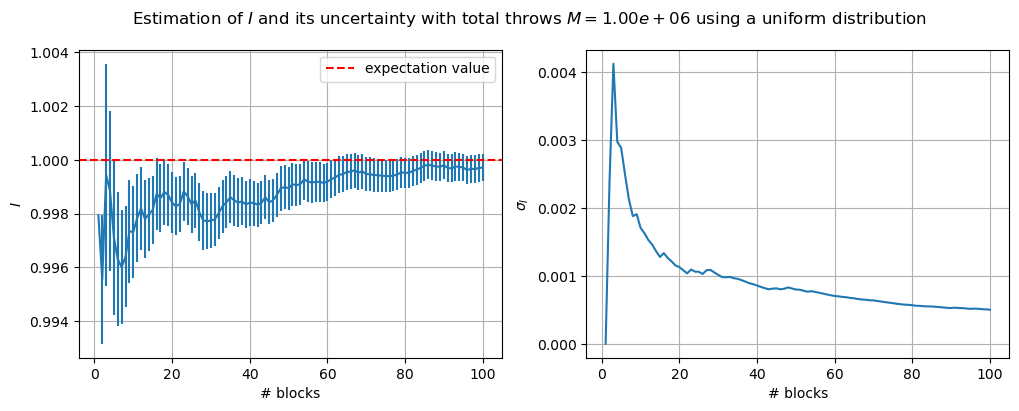

TypeError: 'list' object is not callable

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

mean = []
sigma = []

file = open("results/02-1-1.out", "r")

for line in file: # to read every line of the file
    if line.startswith("# STEPS"):
        NSTEPS = int(line.split()[2])
    elif line.startswith("# BLOCKS"):
        NBLOCKS = int(line.split()[2])
    elif not line.startswith("#"):
        elements = line.split()
        mean.append(float(elements[0]))
        sigma.append(float(elements[1]))
    
file.close()

N = np.arange(1,NBLOCKS+1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.errorbar(N,mean,yerr=sigma)
ax1.set_xlabel('# blocks')
ax1.set_ylabel(r'$I$')
ax1.axhline(y=1, color='r', linestyle='--', label='expectation value')
ax1.grid(True)
ax1.legend()

ax2.plot(N,sigma)
ax2.set_xlabel('# blocks')
ax2.set_ylabel(r'$\sigma_{I}$')
ax2.grid(True)

fig.suptitle(r'Estimation of $I$ and its uncertainty with total throws $M='+str("{:.2e}".format(NSTEPS))+'$ using a uniform distribution')

plt.show()

print("Best estimation of the integral = ", mean(NBLOCKS-1), "\u00B1", sigma(NBLOCKS-1))

To improve the evaluation of the integral we take a different probability distribution to sample in the interval $[0,1]$.

We choose to develop the integrand function $f(x) = \frac{\pi}{2} cos (\frac{\pi x}{2})$ in a McLaurin serie centered in $x=1$:
$$p(x) =  f(1)+ \frac{\partial f}{\partial x} \big|_{x=1} (x-1) + \mathcal{o}((x-1)^2),$$
which becomes
$$ p(x) = 2(1-x) $$
after the normalization, with $x \in [0,1]$, which clearly best fit the integrand rather than the uniform distribution.

The problem is reduced to the calculation of the following integral:

$$I = \int_0^1 \frac{\frac{\pi}{2}\cos(\pi x/2)}{2(1-x)} 2(1-x) dx.$$

A Monte Carlo algorithm to evaluate the integral would be to sample a series of $x_i$ from $p(x)$ and construct the sum

$$ I = \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{p(x_i)}.$$

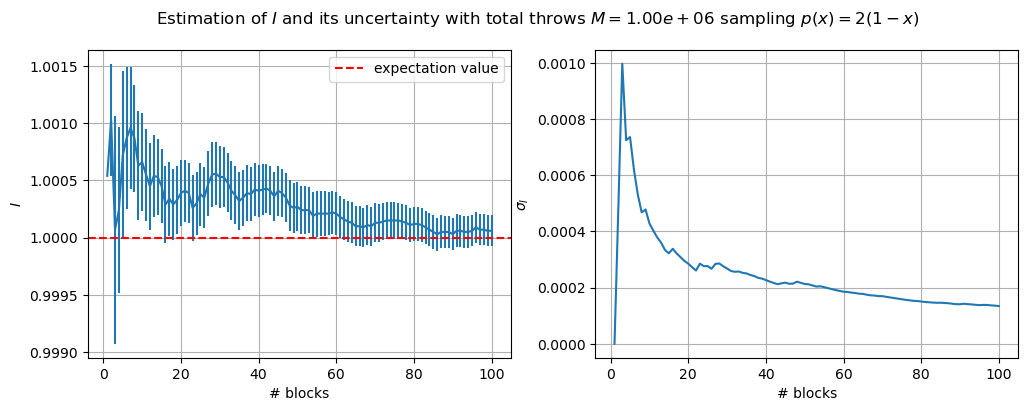

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

mean = []
sigma = []

def sqrt_fit_func(N, a, b):
    return np.sqrt(a * N + b)

file = open("results/02-1-2.out", "r")

for line in file: # to read every line of the file
    if line.startswith("# STEPS"):
        NSTEPS = int(line.split()[2])
    elif line.startswith("# BLOCKS"):
        NBLOCKS = int(line.split()[2])
    elif not line.startswith("#"):
        elements = line.split()
        mean.append(float(elements[0]))
        sigma.append(float(elements[1]))
    
file.close()

N = np.arange(1,NBLOCKS+1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.errorbar(N,mean,yerr=sigma)
ax1.set_xlabel('# blocks')
ax1.set_ylabel(r'$I$')
ax1.axhline(y=1, color='r', linestyle='--', label='expectation value')
ax1.grid(True)
ax1.legend()

ax2.plot(N,sigma)
ax2.set_xlabel('# blocks')
ax2.set_ylabel(r'$\sigma_{I}$')
ax2.grid(True)

fig.suptitle(r'Estimation of $I$ and its uncertainty with total throws $M='+str("{:.2e}".format(NSTEPS))+'$ sampling $p(x)=2(1-x)$')

plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

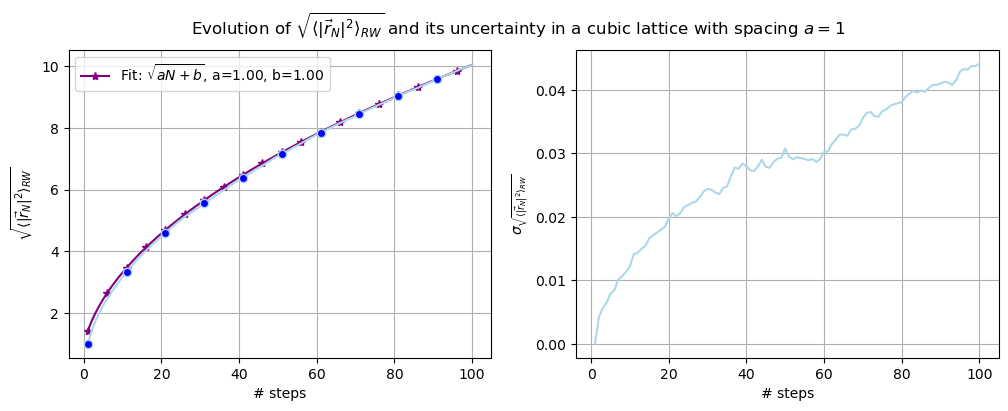

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

mean = []
sigma = []
N = np.arange(1,101)

def sqrt_fit_func(N, a, b):
    return np.sqrt(a * N + b)

file = open("results/02-2-1.out", "r")

for line in file: # to read every line of the file
    elements = line.split()
    mean.append(float(elements[0]))
    sigma.append(float(elements[1]))
    
file.close()

# Fitting dei dati
popt, pcov = curve_fit(sqrt_fit_func, N, mean, sigma=sigma)

# Parametri ottimali del fit
a_fit, b_fit = popt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.errorbar(N,mean,yerr=sigma,color='lightblue',marker='o',markevery=10, markerfacecolor='blue')
ax1.plot(N, sqrt_fit_func(N, *popt), color='purple', marker='*', markevery=5, label=f'Fit: $\\sqrt{{a N + b}}$, a={a_fit:.2f}, b={b_fit:.2f}')
ax1.set_xlabel('# steps')
ax1.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
ax1.legend()
ax1.grid(True)

ax2.plot(N,sigma,color='lightblue')
ax2.set_xlabel('# steps')
ax2.set_ylabel(r'$\sigma_{\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}}$')
ax2.grid(True)

fig.suptitle(r'Evolution of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ and its uncertainty in a cubic lattice with spacing $a=1$')

plt.show()

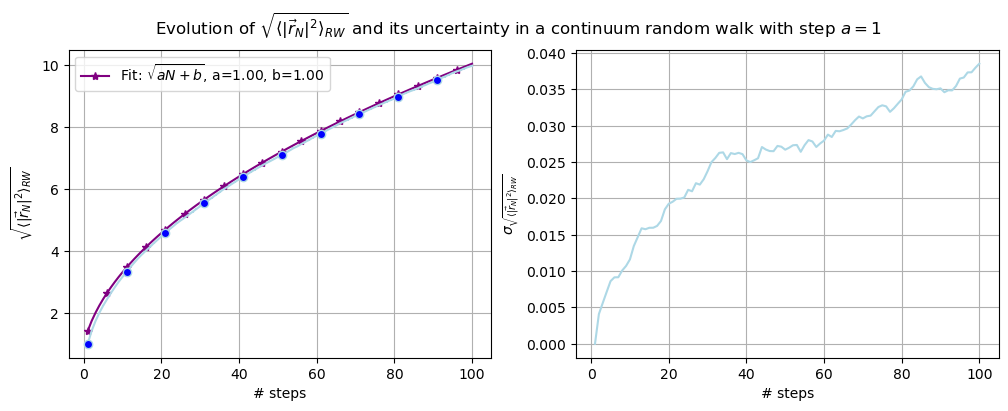

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

mean = []
sigma = []
N = np.arange(1,101)

def sqrt_fit_func(N, a, b):
    return np.sqrt(a * N + b)

file = open("results/02-2-2.out", "r")

for line in file: # to read every line of the file
    elements = line.split()
    mean.append(float(elements[0]))
    sigma.append(float(elements[1]))
    
file.close()

# Fitting dei dati
popt, pcov = curve_fit(sqrt_fit_func, N, mean, sigma=sigma)

# Parametri ottimali del fit
a_fit, b_fit = popt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.errorbar(N,mean,yerr=sigma,color='lightblue',marker='o',markevery=10, markerfacecolor='blue')
ax1.plot(N, sqrt_fit_func(N, *popt), color='purple', marker='*', markevery=5, label=f'Fit: $\\sqrt{{a N + b}}$, a={a_fit:.2f}, b={b_fit:.2f}')
ax1.set_xlabel('# steps')
ax1.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
ax1.legend()
ax1.grid(True)

ax2.plot(N,sigma,color='lightblue')
ax2.set_xlabel('# steps')
ax2.set_ylabel(r'$\sigma_{\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}}$')
ax2.grid(True)

fig.suptitle(r'Evolution of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ and its uncertainty in a continuum random walk with step $a=1$')

plt.show()